# Figure 2

img-loss-pert

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

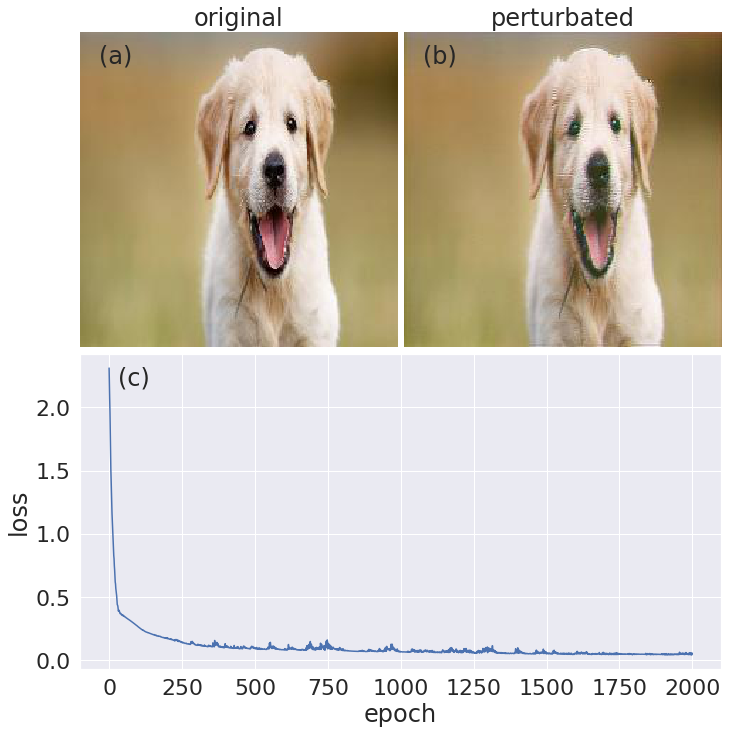

In [105]:
import os
from skimage import io
from matplotlib.gridspec import GridSpec

folder = "data/perturbations/dog/2018-07-22 15:39:08.328737/"
sns.set(font_scale=2)

fname = os.path.join(folder, "original.jpg")
or_img = io.imread(fname)

fname = os.path.join(folder, "loss_history.npy")
loss_hist = np.load(fname)

fname = os.path.join(folder, "perturbated.jpg")
pert_img = io.imread(fname)

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(or_img)
plt.axis("off")
# ax = plt.gca()
ax0.annotate("(a)", xy=(0.06, 0.9), xycoords="axes fraction")
plt.title("original")
# ax = plt.gca()
ax0.set_aspect("auto")

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(pert_img)
plt.axis("off")
ax1.annotate("(b)", xy=(0.06, 0.9), xycoords="axes fraction")
plt.title("perturbated")
# ax = plt.gca()
ax1.set_aspect("auto")

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("loss")
ax2.annotate("(c)", xy=(0.06, 0.9), xycoords="axes fraction")
# ax = plt.gca()
ax2.set_aspect("auto")

plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.savefig("img-loss-pert.jpg", bbox="tight")

# Figure 3

origs_perts_diffs.jpg

didn't get the latest imgs above. will specify by hand the desired folders:

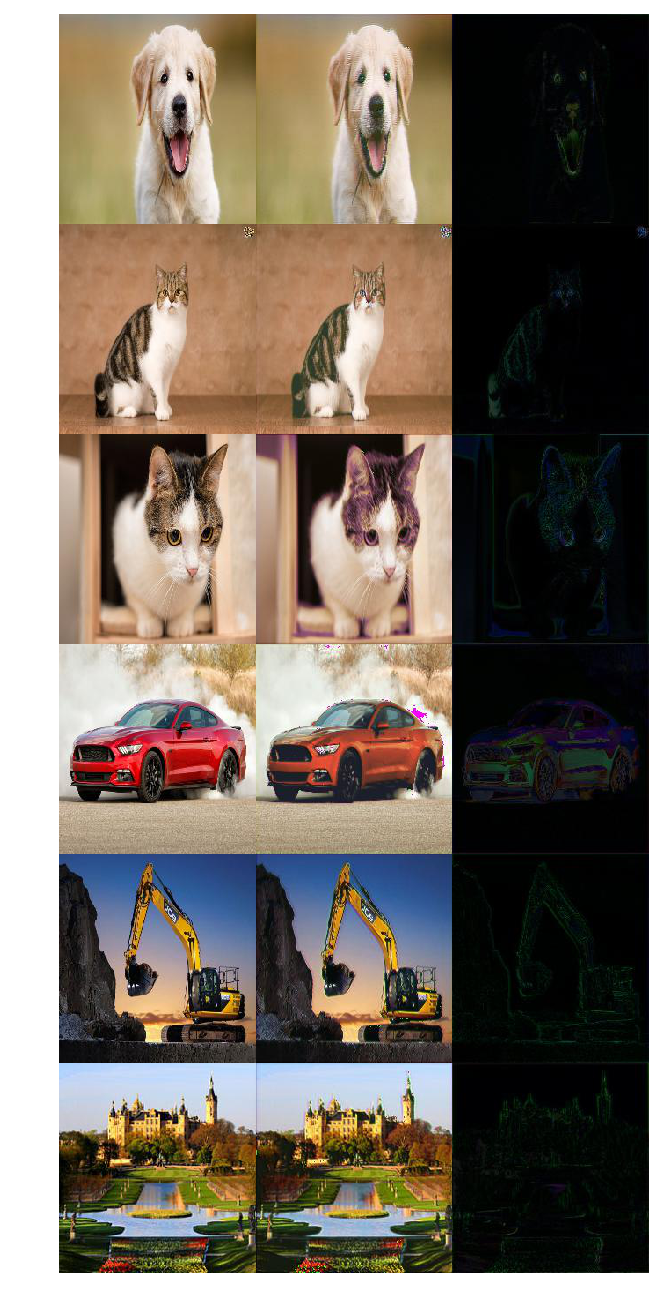

In [113]:
folders = [
    "data/perturbations/dog/2018-07-22 15:39:08.328737/",
    "data/perturbations/cat/2018-07-22 15:23:36.936765/",
    "data/perturbations/cat2/2018-07-22 15:31:22.377249/",
    "data/perturbations/car/2018-07-22 15:15:42.316242/",
    "data/perturbations/excavator/2018-07-22 15:46:53.904665/",
    "data/perturbations/palace/2018-07-22 16:02:56.023002/",
]

n_rows = len(folders)
n_cols = 3
img_side = 3.
plt.figure(figsize=(n_cols * img_side, n_rows * img_side))

for row_idx, folder in enumerate(folders):
    img_names = ["original", "perturbated", "differences"]
    
    for col_idx, img_name in enumerate(img_names):
        fname = os.path.join(folder, "{}.jpg".format(img_name))
        img = io.imread(fname)
        plt.subplot(n_rows, n_cols, n_cols * row_idx + col_idx + 1)
        plt.imshow(img)
        plt.axis("off")
        ax = plt.gca()
        ax.set_aspect("auto")
    
plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("origs-perts-diffs.jpg", bbox="tight")

# Figure 4

dog_to_polar_bear.jpg

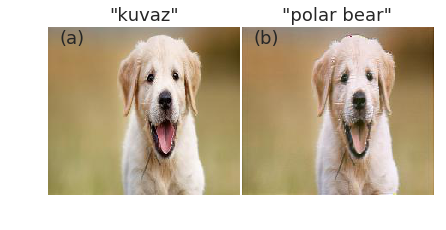

In [123]:
import os
from skimage import io
from matplotlib.gridspec import GridSpec

folder = "data/perturbations/dog/to_polar_bear/2018-07-23 15:47:53.201220/"
sns.set(font_scale=1.5)

fname = os.path.join(folder, "original.jpg")
or_img = io.imread(fname)

fname = os.path.join(folder, "perturbated.jpg")
pert_img = io.imread(fname)

img_side = 3.
fig = plt.figure(figsize=(2 * img_side, img_side))
gs = GridSpec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(or_img)
plt.axis("off")
# ax = plt.gca()
ax0.annotate("(a)", xy=(0.06, 0.9), xycoords="axes fraction")
plt.title('"kuvaz"')
# ax = plt.gca()
ax0.set_aspect("auto")

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(pert_img)
plt.axis("off")
ax1.annotate("(b)", xy=(0.06, 0.9), xycoords="axes fraction")
plt.title('"polar bear"')
# ax = plt.gca()
ax1.set_aspect("auto")

plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0.01, hspace=0.0)
plt.savefig("dog-to-polar-bear.jpg", bbox="tight")

# table 1 (image results table)

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def process_class_name(x):
    names = x.split(",")
    name = names[0]
    pref_names = ["cat", "dog", "car", "vehicle"]
    for other_name in names:
        for pref_name in pref_names:
            if pref_name in other_name:
                name = other_name
                break
    words = name.split(" ")
#     if len(words) > 2: words.insert(2, "\n")
    return " ".join(words)


def process_class_score_df(df):
    df.columns = ["class", "score"]
    df = df.sort("score", ascending=False)
    df = df.head()
    df["class"] = df["class"].map(process_class_name)
    df["score"] = df["score"].round(decimals=4)
    return df


def get_sample_subdf(fname = "data/perturbations/dog/2018-07-22 15:39:08.328737/scores.csv"):
    sample_df = pd.read_csv(fname)
    sample_df.columns = ["index", "class", "original", "perturbated"]

    df_orig = sample_df[["class", "original"]]
    df_orig = process_class_score_df(df_orig)
    df_pert = sample_df[["class", "perturbated"]]
    df_pert = process_class_score_df(df_pert)
    df_orig.columns = pd.MultiIndex.from_product([["original"], ["class", "score"]])
    df_orig.index = range(5)
    df_pert.columns = pd.MultiIndex.from_product([["perturbated"], ["class", "score"]])
    df_pert.index = range(5)
    row_df = pd.concat([df_orig, df_pert], axis=1)
    
    # add empty row at the end:
    empty = pd.Series(['', '', '', ''], index=row_df.columns)
    row_df = row_df.append(empty, ignore_index=True)
    
    return row_df

def build_full_df(fnames):
    sub_dfs = []
    for sample_index, fname in enumerate(fnames):
        sample_df = get_sample_subdf(fname)
#         sample_df.index = pd.MultiIndex.from_product([[sample_index+1], range(1, 6)],
#                                                     names=["sample", "class rank"])
#         sample_df.index = 5 * [sample_index + 1]
        sample_df.index = pd.MultiIndex.from_product([[sample_index+1], 6 * [""]], # 5 +  one empty row
                                                    names=["sample", ""])
        sub_dfs.append(sample_df)
    df = pd.concat(sub_dfs, axis=0)
    df.index.name = "sample"
    return df


fnames = [
    "data/perturbations/dog/2018-07-22 15:39:08.328737/scores.csv",
    "data/perturbations/cat/2018-07-22 15:23:36.936765/scores.csv",
    "data/perturbations/cat2/2018-07-22 15:31:22.377249/scores.csv",
    "data/perturbations/car/2018-07-22 15:15:42.316242/scores.csv",
    "data/perturbations/excavator/2018-07-22 15:46:53.904665/scores.csv",
    "data/perturbations/palace/2018-07-22 16:02:56.023002/scores.csv",
]

full_df = build_full_df(fnames)

with open("image_results_table.tex", "w") as fp:
    fp.write(full_df.to_latex())
    
full_df

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


original                  perturbated        
                        class   score                class   score
sample                                                            
1                      kuvasz  0.8234         African grey  0.9961
               Great Pyrenees  0.1412               muzzle  0.0007
             golden retriever  0.0236               kuvasz  0.0003
           Labrador retriever  0.0031         carriage dog  0.0003
         Old English sheepdog  0.0016                 swab  0.0002
                                                                  
2                   tabby cat  0.8022         king penguin  0.9877
                    tiger cat  0.1246      prairie chicken   0.009
                 Egyptian cat  0.0701                 hare  0.0004
                  Persian cat  0.0011         Egyptian cat  0.0004
                      doormat  0.0004            albatross  0.0003
                                                                  
3                Egyptian cat  0.5098               screen  0.3684
                    tabby cat  0.2082              monitor  0.3245
                    tiger cat  0.0819           television  0.1768
                window screen  0.0631    computer keyboard  0.0433
                 window shade  0.0317             notebook  0.0202
                                                                  
4                   sport car  0.5307   amphibious vehicle  0.9783
                    car wheel  0.1315           racing car  0.0067
                       grille  0.1093            speedboat  0.0062
                  convertible  0.1037            sport car  0.0026
                   estate car  0.0631            car wheel  0.0023
                                                                  
5                       crane  0.9656            mousetrap  0.2222
                        wreck  0.0204             cassette  0.1466
                    harvester  0.0024                 iPod  0.0958
               container ship  0.0021     pencil sharpener  0.0585
                         plow  0.0008           television  0.0562
                                                                  
6                      castle  0.7823                 desk   0.415
                     lakeside   0.037     desktop computer  0.1414
                      gondola  0.0344              monitor  0.0753
                    submarine   0.029               screen  0.0506
                         dock  0.0265           restaurant  0.0198

saved the above code in "pandas_df_to_latex.py".

# Figure 5 videos

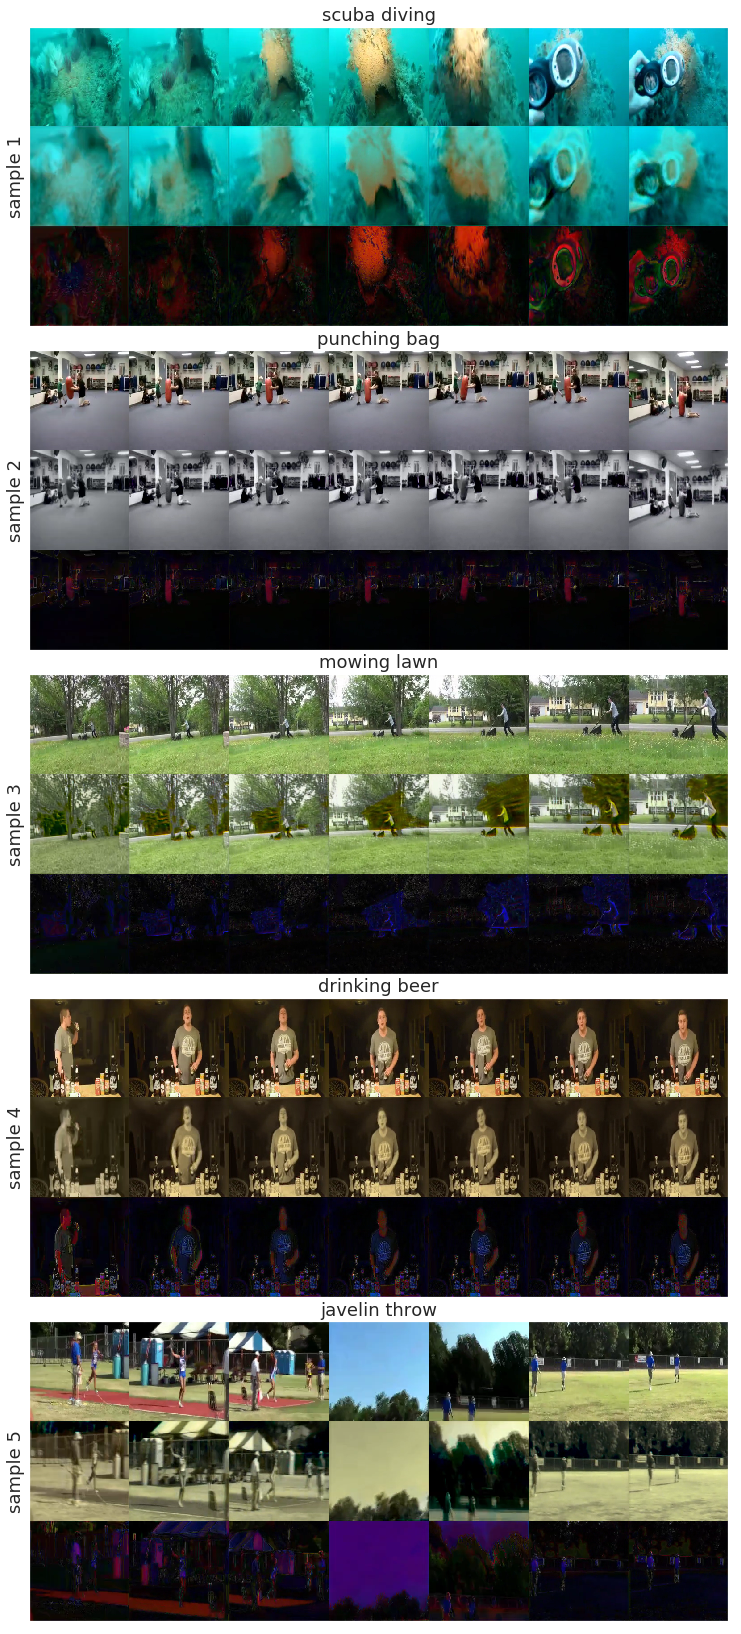

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import skvideo.io
import os

sns.set(font_scale=1.5)

folders = [
    "data/video_perturbations/scuba_diving/2018-07-23 03:18:04.169892/",
    "data/video_perturbations/punching_bag/2018-07-23 02:15:40.900206/",
    "data/video_perturbations/mowing_lawn/2018-07-23 01:15:10.280387/",
    "data/video_perturbations/drinking_beer/2018-07-22 22:01:41.900350/",
    "data/video_perturbations/javelin_throw/2018-07-23 00:12:48.856662/",
]
names = ["original_224x224", "perturbated", "differences"]

side = 1.5
nframes = 7
nsamples = len(folders)
nimgtypes = len(names)
plt.figure(figsize=(side * nframes, nsamples * nimgtypes * side))

for sample_number, folder in enumerate(folders):  
    vid_imgs = []

    for row_number, name in enumerate(names):
        fname = os.path.join(folder, name + ".mp4")
        vid = skvideo.io.vread(fname)
        interval = int(np.floor(vid.shape[0] / float(nframes)))
        vid = vid[::interval, ...]
        vid = vid[:nframes, ...]

        vid_img = np.concatenate(list(vid), axis=1)
        vid_imgs.append(vid_img)

    vid_imgs = np.concatenate(vid_imgs, axis=0)
    action = folder.split("/")[2].replace("_", " ")
    
    plt.subplot(nsamples, 1, sample_number + 1)
    plt.imshow(vid_imgs)
    # plt.axis("off")
    plt.ylabel("sample {}".format(sample_number + 1))
    plt.xticks([])
    plt.yticks([])
    plt.title(action)
    
plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0., hspace=0.08)
plt.savefig("videos.jpg", bbox="tight")

# table 2 (video results)

In [7]:
import pandas_df_to_latex; reload(pandas_df_to_latex)

folders = [
    "data/video_perturbations/scuba_diving/2018-07-23 03:18:04.169892/",
    "data/video_perturbations/punching_bag/2018-07-23 02:15:40.900206/",
    "data/video_perturbations/mowing_lawn/2018-07-23 01:15:10.280387/",
    "data/video_perturbations/drinking_beer/2018-07-22 22:01:41.900350/",
    "data/video_perturbations/javelin_throw/2018-07-23 00:12:48.856662/",
]

pandas_df_to_latex.main(fnames=folders, save_to="video_results_table.tex")

original                        perturbated  \
                                    class   score                      class   
sample                                                                         
1                            scuba diving  0.8832             smoking hookah   
                               snorkeling   0.114                    smoking   
                            cleaning pool  0.0026               scuba diving   
                       springboard diving  0.0002  swimming butterfly stroke   
                        jumping into pool  0.0001              surfing water   
                                                                               
2                            punching bag  0.9183               breakdancing   
                             drop kicking  0.0299              skateboarding   
                                side kick  0.0226          jumpstyle dancing   
                 punching person (boxing)  0.0048                   krumping   
         exercising with an exercise ball   0.003                tap dancing   
                                                                               
3                             mowing lawn  0.9681                tobogganing   
                          walking the dog  0.0284                bobsledding   
                             training dog  0.0034               training dog   
                           sweeping floor       0            walking the dog   
                           blowing leaves       0                mowing lawn   
                                                                               
4                            tasting beer   0.449                slacklining   
                            drinking beer  0.2442                deadlifting   
                               bartending  0.2127                headbanging   
                           opening bottle  0.0458                   pull ups   
                                 drinking  0.0337            recording music   
                                                                               
5                           javelin throw  0.9893                ice skating   
                                long jump  0.0056         playing ice hockey   
            catching or throwing softball  0.0012             roller skating   
                          throwing discus  0.0011             playing tennis   
                              triple jump  0.0009                hockey stop   
                                                                               

                 
          score  
sample           
1         0.995  
          0.004  
         0.0008  
         0.0001  
              0  
                 
2        0.9656  
         0.0143  
         0.0053  
         0.0039  
         0.0023  
                 
3        0.9982  
         0.0006  
         0.0004  
         0.0004  
         0.0003  
                 
4        0.8925  
         0.0531  
         0.0142  
         0.0057  
         0.0023  
                 
5        0.9411  
         0.0188  
         0.0178  
         0.0053  
         0.0046